# Air Pollution Forecasting Using FBProphet

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  18218 non-null  object 
 1   temp             18218 non-null  float64
 2   city_name        18218 non-null  object 
 3   country_code     18218 non-null  object 
 4   aqi              18218 non-null  float64
 5   co               18218 non-null  float64
 6   no2              18218 non-null  float64
 7   o3               18218 non-null  float64
 8   pm10             18218 non-null  float64
 9   pm25             18218 non-null  float64
 10  so2              18218 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.5+ MB


In [4]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp_local  18218 non-null  datetime64[ns]
 1   temp             18218 non-null  float64       
 2   city_name        18218 non-null  object        
 3   country_code     18218 non-null  object        
 4   aqi              18218 non-null  float64       
 5   co               18218 non-null  float64       
 6   no2              18218 non-null  float64       
 7   o3               18218 non-null  float64       
 8   pm10             18218 non-null  float64       
 9   pm25             18218 non-null  float64       
 10  so2              18218 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 1.5+ MB


In [6]:
temp = df[['timestamp_local','temp']]

In [7]:
temp.head()

,timestamp_local,temp
0,2022-02-01 00:00:00,12.6
1,2022-02-01 01:00:00,11.5
2,2022-02-01 02:00:00,11.9
3,2022-02-01 03:00:00,12.2
4,2022-02-01 04:00:00,11.9


In [8]:
temp = temp.rename(columns={'timestamp_local': 'ds', 'temp': 'y'})

In [9]:
temp.head()

,ds,y
0,2022-02-01 00:00:00,12.6
1,2022-02-01 01:00:00,11.5
2,2022-02-01 02:00:00,11.9
3,2022-02-01 03:00:00,12.2
4,2022-02-01 04:00:00,11.9


In [10]:
temp.tail()

,ds,y
18213,2024-02-29 19:00:00,20.7
18214,2024-02-29 20:00:00,18.1
18215,2024-02-29 21:00:00,18.5
18216,2024-02-29 22:00:00,17.4
18217,2024-02-29 23:00:00,17.4


In [11]:
X = temp[:-168]

In [12]:
y = temp[-168:]

In [13]:
X.head()

,ds,y
0,2022-02-01 00:00:00,12.6
1,2022-02-01 01:00:00,11.5
2,2022-02-01 02:00:00,11.9
3,2022-02-01 03:00:00,12.2
4,2022-02-01 04:00:00,11.9


In [14]:
X.tail()

,ds,y
18045,2024-02-22 19:00:00,15.9
18046,2024-02-22 20:00:00,14.8
18047,2024-02-22 21:00:00,14.8
18048,2024-02-22 22:00:00,13.3
18049,2024-02-22 23:00:00,13.0


In [15]:
y.head()

,ds,y
18050,2024-02-23 00:00:00,13.0
18051,2024-02-23 01:00:00,12.2
18052,2024-02-23 02:00:00,12.2
18053,2024-02-23 03:00:00,10.7
18054,2024-02-23 04:00:00,10.7


In [16]:
y.tail()

,ds,y
18213,2024-02-29 19:00:00,20.7
18214,2024-02-29 20:00:00,18.1
18215,2024-02-29 21:00:00,18.5
18216,2024-02-29 22:00:00,17.4
18217,2024-02-29 23:00:00,17.4


## Model Fitting

In [17]:
from prophet import Prophet

In [18]:
m = Prophet()
m.fit(X)

22:34:15 - cmdstanpy - INFO - Chain [1] start processing
22:34:40 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,19.192904,15.905108,22.395247
18212,2024-02-29 20:00:00,17.839533,14.745866,20.947352
18213,2024-02-29 21:00:00,16.936351,13.640445,20.037920
18214,2024-02-29 22:00:00,16.431493,12.858829,19.694817
18215,2024-02-29 23:00:00,16.038449,12.874900,19.311545


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


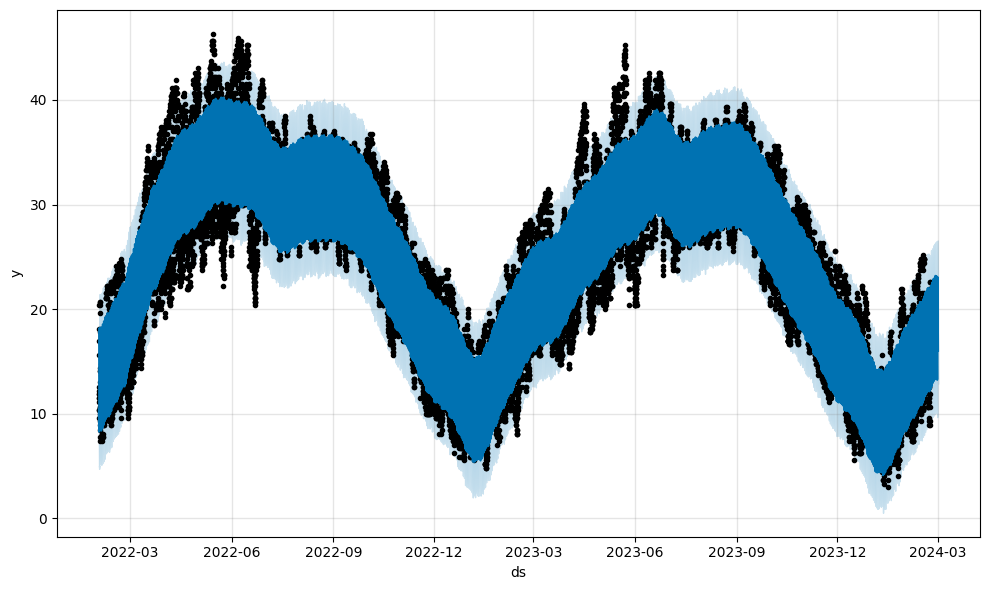

In [21]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

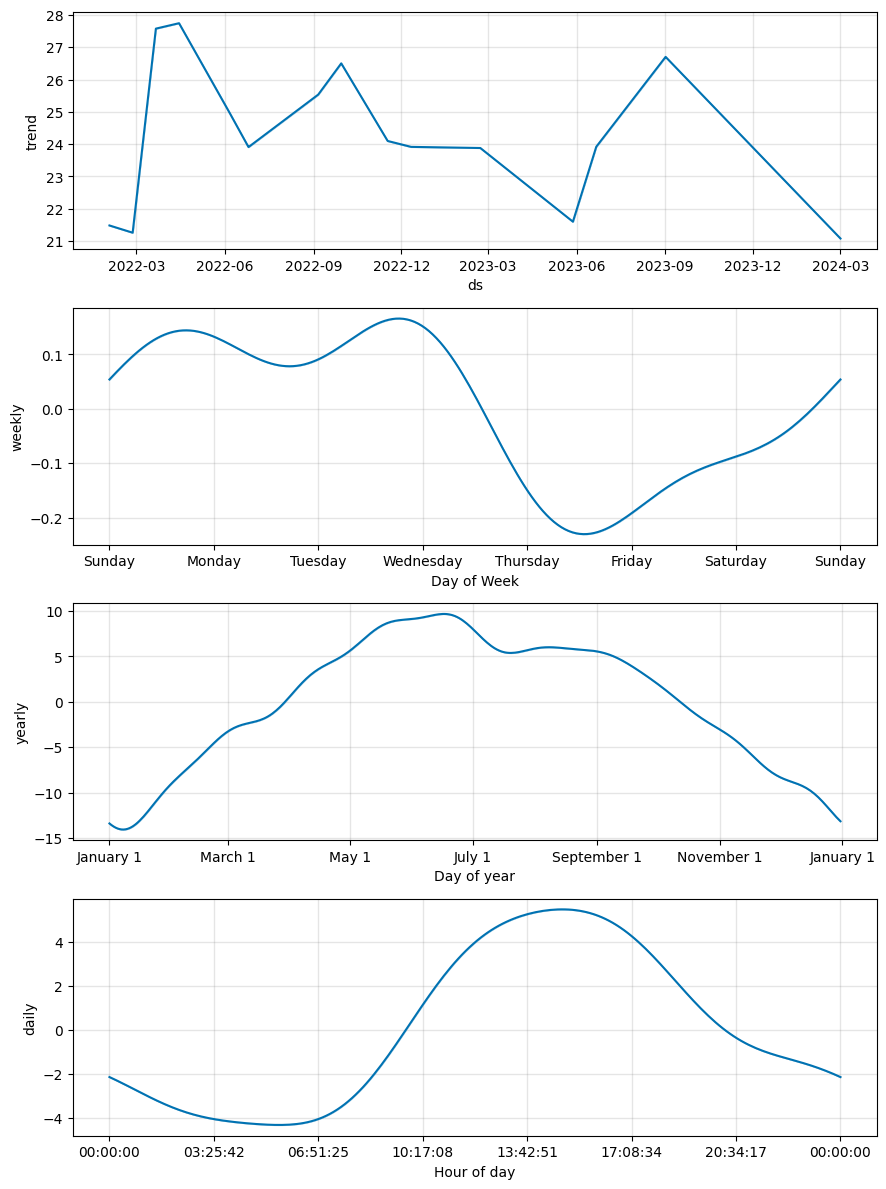

In [22]:
fig2 = m.plot_components(forecast)

In [23]:
predicted = forecast[-168:]

In [24]:
((y['y']-predicted['yhat'])**2).mean()**0.5

3.1013412881739084

## Non Stationary

In [25]:
m = Prophet(interval_width=0.95)
m.fit(X)

22:35:53 - cmdstanpy - INFO - Chain [1] start processing
22:36:18 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,19.192904,14.434965,24.364923
18212,2024-02-29 20:00:00,17.839533,12.602049,22.476480
18213,2024-02-29 21:00:00,16.936351,11.987717,22.014609
18214,2024-02-29 22:00:00,16.431493,11.757562,20.896550
18215,2024-02-29 23:00:00,16.038449,10.531217,21.171418


<Axes: xlabel='ds'>

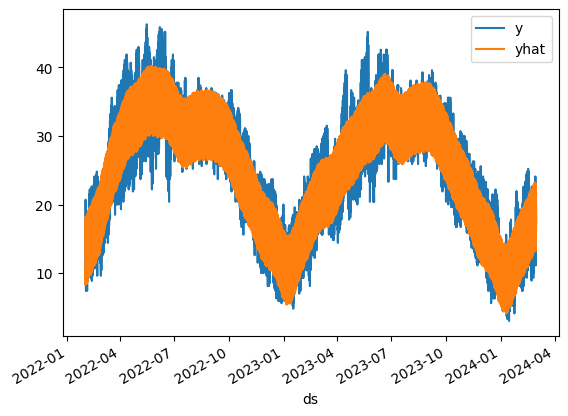

In [28]:
pd.concat([temp.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [29]:
((y['y']-predicted['yhat'])**2).mean()**0.5

3.1013412881739084

## Multiplicative

In [30]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

22:36:46 - cmdstanpy - INFO - Chain [1] start processing
22:37:05 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,18.923205,14.044562,23.912503
18212,2024-02-29 20:00:00,17.570044,12.947923,22.169398
18213,2024-02-29 21:00:00,16.662941,11.802777,21.331868
18214,2024-02-29 22:00:00,16.150058,11.137913,21.070641
18215,2024-02-29 23:00:00,15.748233,11.073040,20.438219


<Axes: xlabel='ds'>

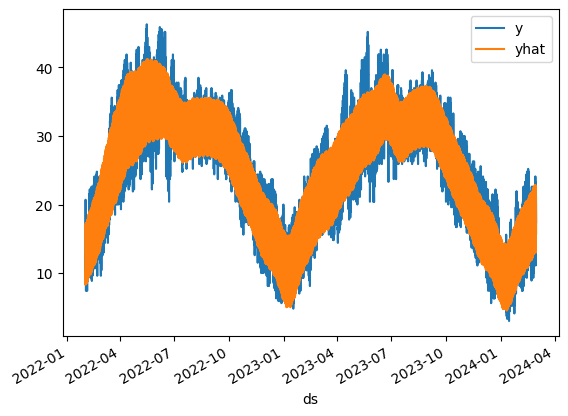

In [33]:
pd.concat([temp.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [34]:
((temp['y']-forecast['yhat'])**2).mean()**0.5

2.927170763212348

In [35]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '600 days', horizon = '30 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/9 [00:00<?, ?it/s]

22:38:18 - cmdstanpy - INFO - Chain [1] start processing
22:38:26 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:42 - cmdstanpy - INFO - Chain [1] done processing
22:38:44 - cmdstanpy - INFO - Chain [1] start processing
22:39:01 - cmdstanpy - INFO - Chain [1] done processing
22:39:04 - cmdstanpy - INFO - Chain [1] start processing
22:39:20 - cmdstanpy - INFO - Chain [1] done processing
22:39:23 - cmdstanpy - INFO - Chain [1] start processing
22:39:35 - cmdstanpy - INFO - Chain [1] done processing
22:39:38 - cmdstanpy - INFO - Chain [1] start processing
22:39:56 - cmdstanpy - INFO - Chain [1] done processing
22:39:59 - cmdstanpy - INFO - Chain [1] start processing
22:40:24 - cmdstanpy - INFO - Chain [1] done processing
22:40:27 - cmdstanpy - INFO - Chain [1] start processing
22:40:47 - cmdstanpy - INFO - Chain [1] done processing
22:40:50 - cmdstanpy - INFO - Chain [1] start processing
22:41:11 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,5.081352,2.254186,1.780534,0.133437,0.085622,0.122831,0.962963
1,3 days 01:00:00,5.108718,2.260247,1.788771,0.133756,0.087191,0.123220,0.962963
2,3 days 02:00:00,5.130747,2.265115,1.795234,0.134052,0.088383,0.123550,0.962963
3,3 days 03:00:00,5.171281,2.274045,1.805923,0.134511,0.088383,0.124081,0.962963
4,3 days 04:00:00,5.181154,2.276215,1.807838,0.134337,0.089088,0.123980,0.962963
...,...,...,...,...,...,...,...,...
644,29 days 20:00:00,13.773344,3.711246,2.979279,0.250145,0.168745,0.215566,0.861111
645,29 days 21:00:00,13.829471,3.718800,2.980566,0.250336,0.169721,0.215578,0.861111
646,29 days 22:00:00,13.834617,3.719492,2.977815,0.250254,0.168745,0.215382,0.859568
647,29 days 23:00:00,13.837622,3.719895,2.975819,0.250103,0.168451,0.215178,0.858025
